<a href="https://colab.research.google.com/github/roxasboss/TM-lyca-2018/blob/master/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime, timedelta  
import time  
from collections import namedtuple  
import pandas as pd 
import requests  
import matplotlib.pyplot as plt  

pd.options.mode.chained_assignment = None
API_KEY = '40b453c139590191'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/Switzerland/Collombey.json"
target_date = datetime(2016, 8, 16)  
features = ["date","meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)

""""def extract_weather_data(url, api_key, target_date, days):  
    records = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records
records = extract_weather_data(BASE_URL, API_KEY, target_date, 500)"""  

'"def extract_weather_data(url, api_key, target_date, days):  \n    records = []\n    for _ in range(days):\n        request = BASE_URL.format(API_KEY, target_date.strftime(\'%Y%m%d\'))\n        response = requests.get(request)\n        if response.status_code == 200:\n            data = response.json()[\'history\'][\'dailysummary\'][0]\n            records.append(DailySummary(\n                date=target_date,\n                meantempm=data[\'meantempm\'],\n                meandewptm=data[\'meandewptm\'],\n                meanpressurem=data[\'meanpressurem\'],\n                maxhumidity=data[\'maxhumidity\'],\n                minhumidity=data[\'minhumidity\'],\n                maxtempm=data[\'maxtempm\'],\n                mintempm=data[\'mintempm\'],\n                maxdewptm=data[\'maxdewptm\'],\n                mindewptm=data[\'mindewptm\'],\n                maxpressurem=data[\'maxpressurem\'],\n                minpressurem=data[\'minpressurem\'],\n                precipm=data[

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
    

Saving weather_records to weather_records
User uploaded file "weather_records" with length 179987 bytes


In [0]:
import pickle 
with open("weather_records", "rb") as f:
    records = pickle.load(f)

In [94]:

df = pd.DataFrame(records, columns=features)
df.info()
#set a pandas dataframe and use the types of datas as "labels" like a dictionary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
date             999 non-null datetime64[ns]
meantempm        999 non-null object
meandewptm       999 non-null object
meanpressurem    999 non-null object
maxhumidity      999 non-null object
minhumidity      999 non-null object
maxtempm         999 non-null object
mintempm         999 non-null object
maxdewptm        999 non-null object
mindewptm        999 non-null object
maxpressurem     999 non-null object
minpressurem     999 non-null object
precipm          999 non-null object
dtypes: datetime64[ns](1), object(12)
memory usage: 101.5+ KB


In [88]:
print(df)

          date meantempm meandewptm meanpressurem maxhumidity minhumidity  \
0   2016-08-16        24         12       1015.52          80          14   
1   2016-08-17        22         12       1012.45          76          21   
2   2016-08-18        18         14       1012.43          91          49   
3   2016-08-19        22         15       1011.39          95          34   
4   2016-08-20        18         15       1016.12          88          60   
5   2016-08-21        18         10       1020.80          92          25   
6   2016-08-22        18          8       1026.82          76          22   
7   2016-08-23        20         12       1024.98          82          25   
8   2016-08-24        23         13       1020.53          82          23   
9   2016-08-25        24         14       1017.46          80          23   
10  2016-08-26        25         16       1017.41          75          25   
11  2016-08-27        26         16       1017.84          85          26   

In [0]:
#the goal with this project is to use the information from the days x-1, x-2,...x-n to predict the mean temperature at a day x
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
for feature in features:
    if feature != 'date':
        for N in range(1,4):
            derive_nth_day_feature(df, feature, N)    
    

In [57]:
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 49 columns):
date               999 non-null datetime64[ns]
meantempm          999 non-null object
meandewptm         999 non-null object
meanpressurem      999 non-null object
maxhumidity        999 non-null object
minhumidity        999 non-null object
maxtempm           999 non-null object
mintempm           999 non-null object
maxdewptm          999 non-null object
mindewptm          999 non-null object
maxpressurem       999 non-null object
minpressurem       999 non-null object
precipm            999 non-null object
meantempm_1        998 non-null object
meantempm_2        997 non-null object
meantempm_3        996 non-null object
meandewptm_1       998 non-null object
meandewptm_2       997 non-null object
meandewptm_3       996 non-null object
meanpressurem_1    998 non-null object
meanpressurem_2    997 non-null object
meanpressurem_3    996 non-null object
maxhumidity_1      998 non-nu

In [0]:
#cleaning data, we remove the useless data
#to_remove = [feature for feature in features if feature not in ["meantempm", "mintempm", "maxtempm"]]

#to_keep = [col for col in df.columns if col not in to_remove]

#df = df[to_keep]
df.columns
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 3 to 998
Data columns (total 49 columns):
date               996 non-null int64
meantempm          996 non-null int64
meandewptm         996 non-null int64
meanpressurem      996 non-null float64
maxhumidity        996 non-null int64
minhumidity        996 non-null int64
maxtempm           996 non-null int64
mintempm           996 non-null int64
maxdewptm          996 non-null int64
mindewptm          996 non-null int64
maxpressurem       996 non-null int64
minpressurem       996 non-null int64
precipm            996 non-null float64
meantempm_1        996 non-null float64
meantempm_2        996 non-null float64
meantempm_3        996 non-null float64
meandewptm_1       996 non-null float64
meandewptm_2       996 non-null float64
meandewptm_3       996 non-null float64
meanpressurem_1    996 non-null float64
meanpressurem_2    996 non-null float64
meanpressurem_3    996 non-null float64
maxhumidity_1      996 non-null float

In [0]:
df = df.drop(['mintempm',"maxtempm","meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem","minpressurem","precipm","date"], axis=1)
X = df[[col for col in df.columns if col != "meantempm"]]
y = df['meantempm'] 

In [0]:
X = df[[col for col in df.columns if col != 'meantempm']]
y = df['meantempm'] 

In [0]:
X = X.values
y= y.values

In [0]:
import keras
import numpy as np
from keras.models import Sequential
import keras.callbacks as cb
from keras.datasets import mnist

from keras.layers import Dense, Dropout,Activation
from keras.optimizers import RMSprop
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))



In [16]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  

class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

        
        
history = LossHistory()
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   796, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [20]:
print(X_tmp)

[[14.  20.  18.  ...  2.   0.9 25. ]
 [ 6.   4.   2.  ...  0.   0.   0. ]
 [10.  10.  10.  ...  0.   0.   0. ]
 ...
 [-3.  -1.  -1.  ...  0.   0.   0. ]
 [23.  22.  22.  ...  0.   0.   0. ]
 [13.  12.  11.  ...  0.   0.   0. ]]


In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype("float32")
X_test = X_test.astype('float32')
y_train = np.reshape(y_train,(796,1))
y_train = y_train.astype("float32")
y_test = np.reshape(y_test,(100,1))
y_test = y_test.astype("float32")
y_val = np.reshape(y_val,(100,1))
y_val = y_val.astype("float32")


In [0]:
y = y/100

In [0]:
print(y)

In [0]:
print(y_train)

In [21]:
print(X_train.shape)
print(y_train.shape)

(796, 36)
(796, 1)


In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype("float32")
X_test = X_test.astype('float32')

In [18]:
model = Sequential()


model.add(Dense(10,kernel_initializer='normal',activation = "relu",input_dim=36))

#model.add(Dense(10,kernel_initializer='normal',activation = "relu"))

model.add(Dense(1, kernel_initializer='normal',activation="linear"))
model.compile(optimizer='adagrad',loss='MAE', metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train,y_train,batch_size =64, epochs = 5000, verbose =0, validation_data=(X_test, y_test))#5000-6000 epochs optimal ex

In [20]:
model.predict(X_val,steps = 1)

array([[14.856474  ],
       [ 6.5329404 ],
       [10.097255  ],
       [22.926237  ],
       [25.025234  ],
       [ 7.5431824 ],
       [-7.5389185 ],
       [17.432764  ],
       [23.214092  ],
       [10.09498   ],
       [18.048883  ],
       [15.896547  ],
       [ 0.1367721 ],
       [10.753691  ],
       [19.038836  ],
       [13.21998   ],
       [11.587533  ],
       [21.026592  ],
       [ 7.4267507 ],
       [ 1.4284793 ],
       [-0.97194505],
       [-1.4529997 ],
       [11.897974  ],
       [ 9.5434    ],
       [ 0.456167  ],
       [13.885712  ],
       [18.45026   ],
       [-2.4548163 ],
       [ 3.0376601 ],
       [18.511795  ],
       [ 8.694941  ],
       [14.154555  ],
       [-7.1189384 ],
       [21.805538  ],
       [ 7.612504  ],
       [11.2873    ],
       [19.475576  ],
       [22.926237  ],
       [ 1.920274  ],
       [22.25048   ],
       [24.739208  ],
       [18.510479  ],
       [12.912376  ],
       [20.623592  ],
       [ 8.142193  ],
       [14

In [21]:
print(y_val)
print(y_val.shape)

[16  6  9 20 23  7 -7 18 25  8 16 15  0 12 18 14 12 23  8  3  0 -2 10  8
  0 16 22  2  6 18  8 14 -5 23  9 13 20 20  6 23 26 20 12 19 10 15 21  4
 16 14 21 16  0 23 22  2 11  1 24 10 22  7 20 18  3 -3  9 16 12 -8  0 24
 12 26 13  8 12  4 10 -4 18  6 22 15 12  2 10 12 13 -1 13 -2  3  3 18 14
 -4  9 22 25]
(100,)


In [23]:
prediction = model.predict(X_val,steps = 1)
mean_error = abs((y_val-prediction))
print("mean absolute error: ")
print(mean_error.mean())
print("median: ")
print(median_absolute_error(y_val, prediction))

mean absolute error: 
9.802996892702579
median: 
1.2535505294799805


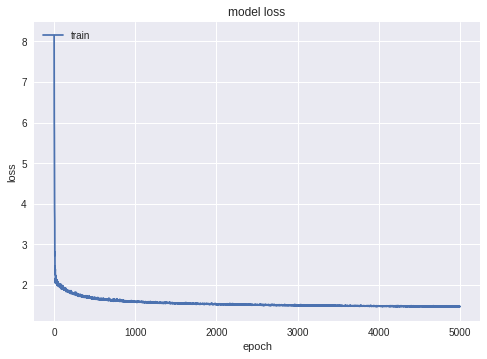

In [24]:
import matplotlib.pyplot as plt



plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
API_KEY = '40b453c139590191'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/Switzerland/Collombey.json"
target_date = datetime(2018,10,16)  
features = ["date","meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)

def extract_weather_data(url, api_key, target_date, days):  
    records_test = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records_test.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records_test
records_test = extract_weather_data(BASE_URL, API_KEY, target_date, 5) 
#we use the data from x-n day to predict the mean temperature at the day x otherwise we could have missing data

In [39]:
df1 = pd.DataFrame(records_test, columns=features)
print(df1)

        date meantempm meandewptm meanpressurem maxhumidity minhumidity  \
0 2018-10-16        16          5       1019.12          71          23   
1 2018-10-17        14          6       1018.53          76          22   
2 2018-10-18        14          7       1016.94          87          28   
3 2018-10-19        14          7       1019.95          87          34   
4 2018-10-20        13          8       1025.15          93          38   

  maxtempm mintempm maxdewptm mindewptm maxpressurem minpressurem precipm  
0       23        8         7         3         1021         1015     0.0  
1       22        7         8         4         1022         1014     0.0  
2       21        7         9         5         1019         1013     0.0  
3       20        8        10         5         1024         1017     0.0  
4       19        7        10         6         1029         1023     0.0  


In [0]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements
for feature in features:
    if feature != 'date':
        for N in range(1,4):
            derive_nth_day_feature(df1, feature, N)    

In [41]:
df1 = df1.apply(pd.to_numeric, errors="coerce")
print(df1)

                  date  meantempm  meandewptm  meanpressurem  maxhumidity  \
0  1539648000000000000         16           5        1019.12           71   
1  1539734400000000000         14           6        1018.53           76   
2  1539820800000000000         14           7        1016.94           87   
3  1539907200000000000         14           7        1019.95           87   
4  1539993600000000000         13           8        1025.15           93   

   minhumidity  maxtempm  mintempm  maxdewptm  mindewptm    ...      \
0           23        23         8          7          3    ...       
1           22        22         7          8          4    ...       
2           28        21         7          9          5    ...       
3           34        20         8         10          5    ...       
4           38        19         7         10          6    ...       

   mindewptm_3  maxpressurem_1  maxpressurem_2  maxpressurem_3  \
0          NaN             NaN             N

In [0]:
df1 = df1.drop([0,1,2,3])

In [43]:
df1.info()
print (df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4 to 4
Data columns (total 49 columns):
date               1 non-null int64
meantempm          1 non-null int64
meandewptm         1 non-null int64
meanpressurem      1 non-null float64
maxhumidity        1 non-null int64
minhumidity        1 non-null int64
maxtempm           1 non-null int64
mintempm           1 non-null int64
maxdewptm          1 non-null int64
mindewptm          1 non-null int64
maxpressurem       1 non-null int64
minpressurem       1 non-null int64
precipm            1 non-null float64
meantempm_1        1 non-null float64
meantempm_2        1 non-null float64
meantempm_3        1 non-null float64
meandewptm_1       1 non-null float64
meandewptm_2       1 non-null float64
meandewptm_3       1 non-null float64
meanpressurem_1    1 non-null float64
meanpressurem_2    1 non-null float64
meanpressurem_3    1 non-null float64
maxhumidity_1      1 non-null float64
maxhumidity_2      1 non-null float64
maxhumidi

In [0]:
X = df1[[col for col in df1.columns if col != 'meantempm']]

In [0]:
X = X.drop(["meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem",
                "minpressurem","precipm"  ], axis=1)

In [0]:
X = X.drop(['mintempm', 'maxtempm',"date"], axis=1)


In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4 to 4
Data columns (total 36 columns):
meantempm_1        1 non-null float64
meantempm_2        1 non-null float64
meantempm_3        1 non-null float64
meandewptm_1       1 non-null float64
meandewptm_2       1 non-null float64
meandewptm_3       1 non-null float64
meanpressurem_1    1 non-null float64
meanpressurem_2    1 non-null float64
meanpressurem_3    1 non-null float64
maxhumidity_1      1 non-null float64
maxhumidity_2      1 non-null float64
maxhumidity_3      1 non-null float64
minhumidity_1      1 non-null float64
minhumidity_2      1 non-null float64
minhumidity_3      1 non-null float64
maxtempm_1         1 non-null float64
maxtempm_2         1 non-null float64
maxtempm_3         1 non-null float64
mintempm_1         1 non-null float64
mintempm_2         1 non-null float64
mintempm_3         1 non-null float64
maxdewptm_1        1 non-null float64
maxdewptm_2        1 non-null float64
maxdewptm_3        1 non-

In [0]:
X = X.values

In [49]:
model.predict(X,steps = 1)

array([[13.363598]], dtype=float32)

In [0]:
#we can calculate the mean temperature but now the goal is to calculate the min and max temperature (as it shown on a weather forecast)(we could try to predict the precipitations as well)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 3 to 998
Data columns (total 37 columns):
meantempm          996 non-null int64
meantempm_1        996 non-null float64
meantempm_2        996 non-null float64
meantempm_3        996 non-null float64
meandewptm_1       996 non-null float64
meandewptm_2       996 non-null float64
meandewptm_3       996 non-null float64
meanpressurem_1    996 non-null float64
meanpressurem_2    996 non-null float64
meanpressurem_3    996 non-null float64
maxhumidity_1      996 non-null float64
maxhumidity_2      996 non-null float64
maxhumidity_3      996 non-null float64
minhumidity_1      996 non-null float64
minhumidity_2      996 non-null float64
minhumidity_3      996 non-null float64
maxtempm_1         996 non-null float64
maxtempm_2         996 non-null float64
maxtempm_3         996 non-null float64
mintempm_1         996 non-null float64
mintempm_2         996 non-null float64
mintempm_3         996 non-null float64
maxdewptm_1      

In [0]:
df = df.drop(["meantempm","meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem","minpressurem","precipm","date"], axis=1)
X = df[[col for col in df.columns if col != 'maxtempm']]
X = X.drop(["mintempm"],axis=1)
y = df[['maxtempm',"mintempm"]]

In [0]:
X.info()

In [0]:
X = X.values
y= y.values

In [65]:
history = LossHistory()
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   796, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype("float32")
X_test = X_test.astype('float32')

In [67]:
model = Sequential()


model.add(Dense(10,kernel_initializer='normal',activation = "relu",input_dim=36))

#model.add(Dense(10,kernel_initializer='normal',activation = "relu"))

model.add(Dense(2, kernel_initializer='normal',activation="linear"))
model.compile(optimizer='adagrad',loss='MAE', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 392
Trainable params: 392
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train,y_train,batch_size =64, epochs = 5000, verbose =0, validation_data=(X_test, y_test))

In [0]:
model.predict(X_val,steps = 1)

In [70]:
prediction = model.predict(X_val,steps = 1)
mean_error = abs((y_val-prediction))
print("mean absolute error: ")
print(mean_error.mean())
print("median: ")
print(median_absolute_error(y_val, prediction))

mean absolute error: 
1.9001942162960768
median: 


ValueError: ignored

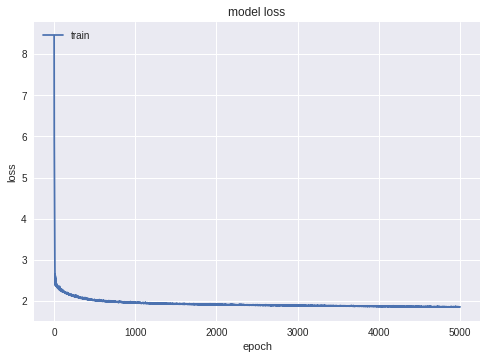

In [71]:
import matplotlib.pyplot as plt



plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
df1.info()

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4 to 4
Data columns (total 36 columns):
meantempm_1        1 non-null float64
meantempm_2        1 non-null float64
meantempm_3        1 non-null float64
meandewptm_1       1 non-null float64
meandewptm_2       1 non-null float64
meandewptm_3       1 non-null float64
meanpressurem_1    1 non-null float64
meanpressurem_2    1 non-null float64
meanpressurem_3    1 non-null float64
maxhumidity_1      1 non-null float64
maxhumidity_2      1 non-null float64
maxhumidity_3      1 non-null float64
minhumidity_1      1 non-null float64
minhumidity_2      1 non-null float64
minhumidity_3      1 non-null float64
maxtempm_1         1 non-null float64
maxtempm_2         1 non-null float64
maxtempm_3         1 non-null float64
mintempm_1         1 non-null float64
mintempm_2         1 non-null float64
mintempm_3         1 non-null float64
maxdewptm_1        1 non-null float64
maxdewptm_2        1 non-null float64
maxdewptm_3        1 non-

In [0]:
X = df1[[col for col in df1.columns if col != 'maxtempm']]

In [0]:
X = X.drop(["meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem",
                "minpressurem","precipm"  ], axis=1)

In [0]:
X = X.drop(['mintempm', 'meantempm',"date"], axis=1)

In [0]:
X = X.values

In [81]:
model.predict(X,steps = 1)

array([[19.45795 ,  8.006131]], dtype=float32)

In [0]:
#precipitation prediction

In [0]:
df.info()

In [102]:
y.info()

AttributeError: ignored

In [0]:
df = df.drop(["maxtempm","mintempm","meantempm","meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem","minpressurem","date"], axis=1)
X = df[[col for col in df.columns if col != 'precipm']]
y = df["precipm"]

In [0]:
X = X.values
y= y.values

In [104]:
history = LossHistory()
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   796, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype("float32")
X_test = X_test.astype('float32')

In [106]:
model = Sequential()


model.add(Dense(10,kernel_initializer='normal',activation = "relu",input_dim=36))

#model.add(Dense(10,kernel_initializer='normal',activation = "relu"))

model.add(Dense(1, kernel_initializer='normal',activation="linear"))
model.compile(optimizer='adagrad',loss='MAE', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train,y_train,batch_size =64, epochs = 5000, verbose =0, validation_data=(X_test, y_test))

In [108]:
model.predict(X_val,steps = 1)

array([[ 3.82413641e-02],
       [-2.31061205e-02],
       [ 3.78088728e-02],
       [ 2.89817303e-01],
       [ 3.23724523e-02],
       [ 7.74316564e-02],
       [ 2.45485082e-02],
       [ 3.57305020e-01],
       [ 3.36413160e-02],
       [ 7.46879354e-02],
       [ 3.99100751e-01],
       [ 1.94888577e-01],
       [ 4.69102636e-02],
       [-3.65279149e-04],
       [ 1.30437836e-01],
       [ 1.79734007e-02],
       [ 1.16723038e-01],
       [ 7.82646909e-02],
       [ 3.44218984e-02],
       [ 1.51090607e-01],
       [ 5.76033369e-02],
       [ 3.01761404e-02],
       [ 5.07926717e-02],
       [ 6.06665388e-02],
       [-9.76660103e-03],
       [ 3.78241986e-01],
       [ 7.97133222e-02],
       [ 1.77020803e-02],
       [ 2.11262688e-01],
       [-2.52390131e-02],
       [ 3.12471166e-02],
       [ 7.14010969e-02],
       [-1.76244006e-02],
       [ 1.53321996e-02],
       [ 1.15154244e-01],
       [ 6.70642629e-02],
       [ 4.00833860e-02],
       [ 2.89817303e-01],
       [ 6.8

In [109]:
prediction = model.predict(X_val,steps = 1)
mean_error = abs((y_val-prediction))
print("mean absolute error: ")
print(mean_error.mean())
print("median: ")
print(median_absolute_error(y_val, prediction))

mean absolute error: 
0.7592129325611144
median: 
0.05725438371300698


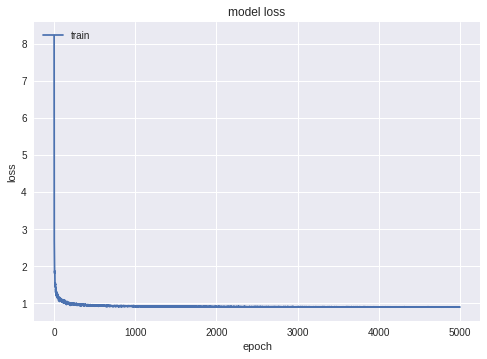

In [110]:
import matplotlib.pyplot as plt



plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
X = df1[[col for col in df1.columns if col != 'maxtempm']]

In [0]:
X = X.drop(["meandewptm","meanpressurem","maxhumidity","minhumidity","maxdewptm","mindewptm","maxpressurem",
                "minpressurem","precipm"  ], axis=1)

In [0]:
X = X.drop(['mintempm', 'meantempm',"date"], axis=1)

In [0]:
X = X.values

In [115]:
model.predict(X,steps = 1)

array([[0.03763476]], dtype=float32)